# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
btc_data = requests.get(btc_url).json()
eth_data = requests.get(eth_url).json()
#print(json.dumps(eth_data, indent=4))

In [5]:
# Fetch current BTC price
my_btc_price_cad = btc_data['data']['1']['quotes']['CAD']['price']
my_btc_price_usd = btc_data['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
my_eth_price_cad = eth_data['data']['1027']['quotes']['CAD']['price']
my_eth_price_usd = eth_data['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
my_btc_value = my_btc_price_cad * my_btc
my_btc_value_usd = my_btc_price_usd * my_btc
my_eth_value = my_btc_price_cad * my_eth
my_eth_value_usd = my_btc_price_usd * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $71673.37
The current value of your 5.3 ETH is $316557.40


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2024-01-05", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                              \
                          close   high      low trade_count   open   volume   
timestamp                                                                     
2024-01-05 05:00:00+00:00  98.2  98.69  98.0694       30757  98.13  9038700   

                                         SPY                              \
                                vwap   close    high     low trade_count   
timestamp                                                                  
2024-01-05 05:00:00+00:00  98.320508  467.92  470.44  466.43      561741   

                                                         
                             open    volume        vwap  
timestamp                                                
2024-01-05 05:00:00+00:00  467.49  86091270  468.077782

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.2
Current SPY closing price: $467.92


In [10]:
# Compute the current value of shares
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23396.00
The current value of your 200 AGG shares is $19640.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value_usd + my_eth_value_usd
shares_value = my_spy_value + my_agg_value
savings_data = {'amount':[crypto_value,shares_value]}

# Create savings DataFrame
columns = ['crypto','shares']
df_savings=pd.DataFrame(savings_data,index=columns)

# Display savings DataFrame
display(df_savings)

,amount
crypto,285779.0
shares,43036.0


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

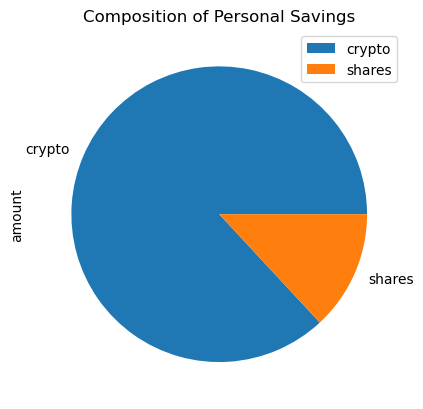

In [12]:
# Plot savings pie chart
df_savings.plot.pie(title = 'Composition of Personal Savings', y = 'amount')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings>emergency_fund:
    print('Congratulation! You have enough money in this fund.')
elif total_savings==emergency_fund:
    print('Congratulation! You reach the financial goal.')
else:
    fund_away=emergency_fund-total_savings
    print (f'You are ${fund_away} away from reaching the goal.')

Congratulation! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker_retire = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG_retire = df_ticker_retire[df_ticker_retire['symbol']=='AGG'].drop('symbol', axis=1)
SPY_retire = df_ticker_retire[df_ticker_retire['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_retire, SPY_retire],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [79]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [80]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [81]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996757,0.997185,0.998217,1.004737,0.997938,1.009883,0.999417,1.004966,0.999005,1.002239,...,0.999386,1.009834,1.006576,0.995480,1.003894,1.011960,1.001297,1.005880,0.991447,0.985895
2,0.993471,1.002052,1.010520,1.006726,0.987278,1.012283,1.000838,1.015426,0.997756,0.995477,...,1.009029,1.017967,1.008353,0.998451,1.000668,1.003987,0.997441,1.002005,0.996172,0.975758
3,0.988641,0.992044,1.031812,1.005847,0.986677,1.013978,1.003842,1.010898,1.001097,0.999248,...,1.000558,1.024246,1.009225,0.994252,1.000050,1.009517,0.988954,1.012017,0.993047,0.979483
4,0.983087,0.994567,1.045355,1.010917,0.995116,1.009807,0.997936,1.028955,1.004252,1.004214,...,1.001306,1.014398,1.015360,1.001267,1.010287,1.004252,0.996582,1.020703,0.999818,0.983585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,21.217277,11.774200,20.793266,88.214259,7.029898,16.480951,9.254423,14.101369,32.202604,13.612654,...,4.075618,3.614171,21.179079,82.944406,2.798593,38.695776,10.861164,13.990177,42.656658,23.597320
7557,21.098894,11.738973,20.862545,88.489881,7.008469,16.531167,9.232382,14.073799,32.775705,13.568805,...,4.097306,3.604925,21.114536,83.023159,2.778201,38.755950,10.894047,13.855457,42.523839,23.500932
7558,21.089373,11.834130,21.169382,88.777084,7.026734,16.385415,9.203345,14.190399,32.983667,13.510245,...,4.104545,3.624763,21.076510,82.136445,2.790377,38.800650,10.882000,13.743157,42.651998,23.445605
7559,21.046027,11.631275,21.078003,89.233343,7.027943,16.405065,9.055849,14.068899,32.948058,13.568467,...,4.093743,3.603204,21.156893,82.051725,2.806885,38.802373,10.929013,13.661249,41.981731,23.301911


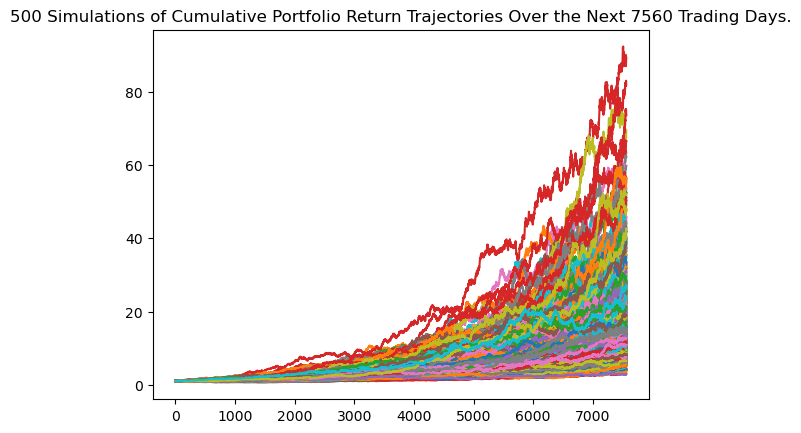

In [107]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

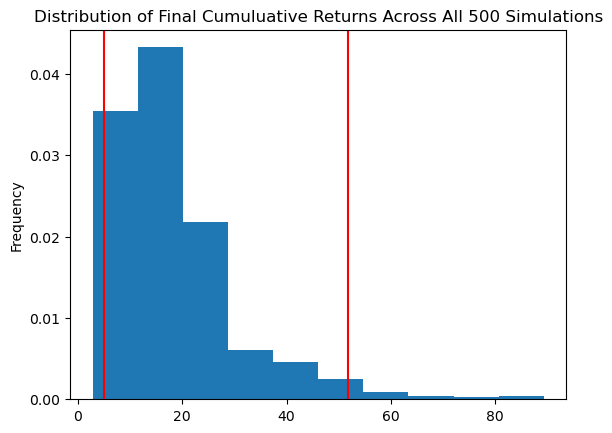

In [108]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             18.284445
std              12.287955
min               2.851241
25%              10.048386
50%              15.048383
75%              22.365559
max              89.285553
95% CI Lower      4.945865
95% CI Upper     51.818070
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [85]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $98917.3 and $1036361.39


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [86]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $148375.95 and $1554542.09


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [16]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [17]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990769,0.997039,0.998888,1.003437,1.004694,1.002399,0.993162,1.003313,0.998731,0.997807,...,1.002765,0.998904,0.992609,1.005288,0.998552,0.996086,0.992912,1.003287,0.986849,0.996055
2,0.980835,0.980210,1.007838,0.988777,0.997240,1.012734,0.994649,0.999187,0.994525,0.995173,...,1.012513,0.997135,0.993281,1.012682,1.007745,0.983800,0.997871,1.008761,1.000477,1.000842
3,0.973949,0.991747,1.022670,1.000278,1.005871,1.024142,0.995582,0.993040,0.998414,0.998531,...,1.010433,0.996324,0.994235,1.014461,1.009406,0.984284,1.005596,1.000528,1.002790,0.997289
4,0.982373,0.989974,1.013709,0.987658,1.008002,1.026391,0.999230,0.985536,0.987734,0.974857,...,1.010206,0.994932,0.984566,1.023150,1.013783,0.986987,1.015962,1.006157,1.004506,1.010878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.330016,1.843759,2.086975,1.726147,1.265263,1.436878,1.165408,1.819850,1.414634,1.938736,...,1.318361,1.641302,1.161217,1.076690,1.077739,1.323507,2.466560,1.034959,1.376039,2.537398
1257,1.325576,1.853032,2.069986,1.721736,1.256084,1.442214,1.162430,1.811158,1.425759,1.931853,...,1.328520,1.662659,1.164902,1.092710,1.077420,1.334027,2.494264,1.043435,1.394895,2.558795
1258,1.324121,1.842235,2.084614,1.726344,1.260908,1.440199,1.161588,1.795107,1.434132,1.934631,...,1.331751,1.657800,1.158694,1.083468,1.085143,1.340341,2.506602,1.043793,1.389696,2.552614
1259,1.326023,1.847518,2.079090,1.724516,1.251021,1.441391,1.160560,1.791453,1.438704,1.932127,...,1.339397,1.662769,1.167054,1.069359,1.079771,1.342786,2.513804,1.044023,1.414435,2.539864


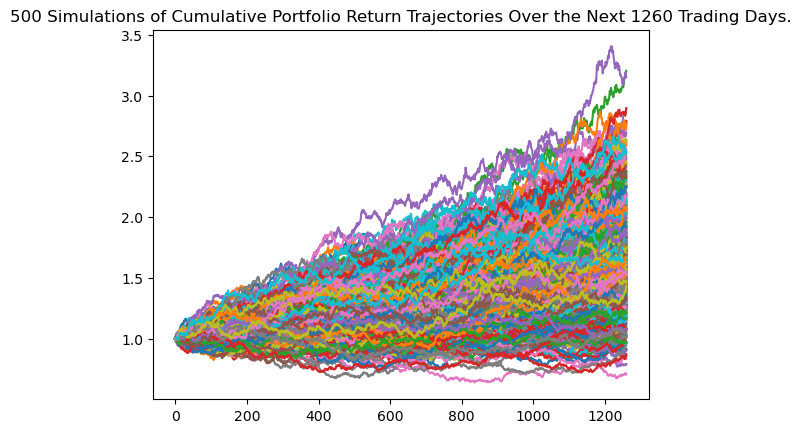

In [18]:
# Plot simulation outcomes
line_plot_five = MC_fiveyear.plot_simulation()

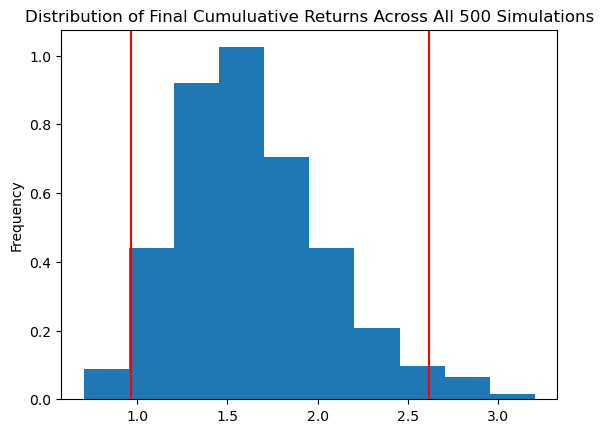

In [19]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyear.plot_distribution()

In [20]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.639531
std               0.415795
min               0.704553
25%               1.354414
50%               1.591861
75%               1.867443
max               3.204206
95% CI Lower      0.965342
95% CI Upper      2.615944
Name: 1260, dtype: float64


In [21]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment,2)
ci_upper_five = round(tbl_five[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57920.53 and $156956.64


### Ten Years Retirement Option

In [97]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [98]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999870,0.994153,0.980862,0.993953,1.003099,0.996174,0.992123,0.988119,1.004545,0.977095,...,0.995426,1.006307,0.997053,1.012199,0.992032,1.007122,1.018542,0.988459,1.025131,0.997051
2,0.999149,1.002861,0.976441,1.009738,0.994905,1.000632,0.979907,0.997281,1.003938,0.960056,...,0.993173,0.985255,0.992342,1.000244,0.990825,1.017113,1.014652,0.991959,1.031919,1.001640
3,0.985471,1.005347,0.969101,0.995233,0.993205,0.995596,0.977014,0.993370,1.004445,0.968929,...,0.975038,0.978013,0.999931,0.989714,0.992592,1.032445,1.030515,0.994196,1.031880,1.003409
4,0.987844,1.001014,0.965636,0.990233,0.994991,0.986778,0.976247,0.993511,1.020375,0.965425,...,0.968558,0.982544,1.004516,1.000999,0.988693,1.028342,1.013034,1.003024,1.029760,0.994464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.684081,2.876177,6.915140,2.349881,6.224969,1.668030,4.450427,2.356874,4.488472,3.153555,...,5.201025,2.015192,1.445954,2.224639,3.807577,6.560009,2.371472,5.555505,3.340980,3.751440
2517,4.739068,2.872672,6.911580,2.310056,6.264986,1.670061,4.480837,2.327965,4.476163,3.182045,...,5.229743,2.020775,1.432400,2.243832,3.772452,6.527133,2.374054,5.515483,3.367850,3.763001
2518,4.745245,2.907328,7.047240,2.350179,6.210173,1.672194,4.523073,2.335205,4.505942,3.117664,...,5.283643,2.039380,1.426362,2.255478,3.798300,6.522967,2.356068,5.415179,3.351438,3.771711
2519,4.743615,2.886909,7.039083,2.336393,6.161730,1.674431,4.534374,2.357087,4.530698,3.146480,...,5.254555,2.030436,1.429081,2.207134,3.810877,6.491004,2.383843,5.429046,3.345055,3.736823


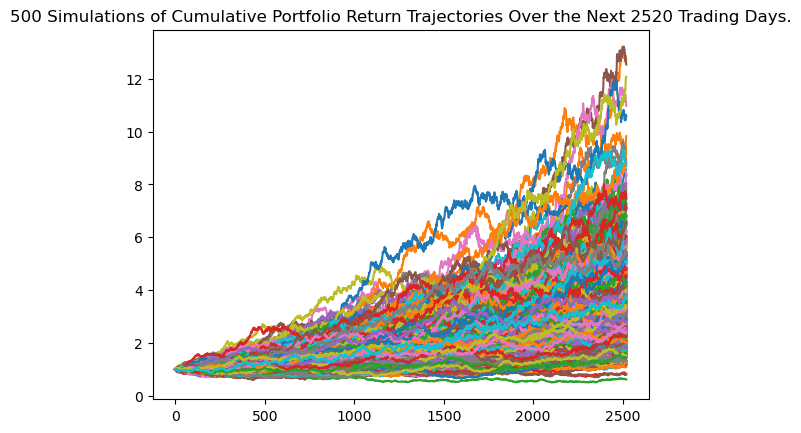

In [99]:
# Plot simulation outcomes
line_plot_ten = MC_tenyear.plot_simulation()

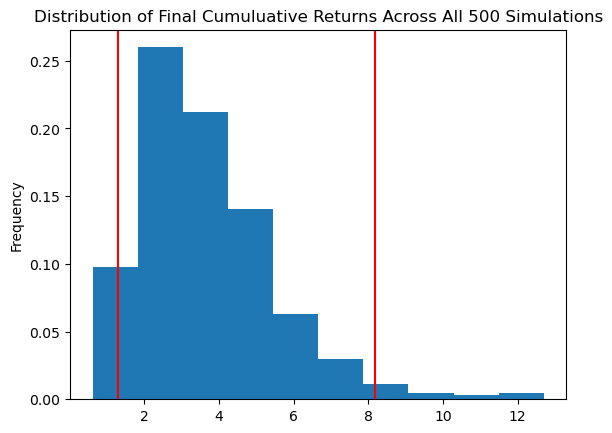

In [100]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_tenyear.plot_distribution()

In [101]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten=MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              3.684846
std               1.856842
min               0.619188
25%               2.340636
50%               3.297893
75%               4.634663
max              12.701030
95% CI Lower      1.294678
95% CI Upper      8.191395
Name: 2520, dtype: float64


In [102]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $77680.65 and $491483.73


### Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?

* From the current simulations of investing more heavily toward stocks for 10 years, it can be easily seen that there is 95% chance that an initial investment of 60000 dollars in the portfolio over the next 10 years will end within the range of 77680.65 dollars and 491483.73 dollars. However, comparing with the simulations of investing more toward bonds for longer time of 30 years, it can be easily seen that there is 95% chance that an initial investment of 30000 dollars (half lower than the 10 years initial investment) in the portfolio over the next 30 years will end within the range of 148375.95 dollars and 1554542.09 dollars. It is clear that the 30 years simulation ending value's lower and upper ends are higher than the 10 years simulation ending value's lower and upper ends, while the initial investment of 30 years simulation is half of 10 years initial investment. Therefore, weighting the porfolio more heavily toward stocks is likely not allowing the credit union members to retire after only 10 years even with 2 times higher initial investments.

*** Note, due to the simulations are run for 500 times only, the above range data results may change a bit under different simulation experiments, however, it won't affect the result that 30 years investment will more likely to have higher return than the 10 years investment of more heavily weights of stocks.